## **IMPORTING REQUIRED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Library used for Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import copy

#Library for Label Encoding
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from collections import Counter
from scipy import spatial
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# **Reading DATA**

In [ ]:
dataset = pd.read_csv('/Users/legion/Downloads/roo_data.csv')
dataset

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,...,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,...,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,...,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,...,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Software Quality Assurance (QA) / Testing


# **Checking all column data and Information**

In [ ]:
all_columns = list(dataset.columns)
print("Columns: ", all_columns)

Columns:  ['Acedamic percentage in Operating Systems', 'percentage in Algorithms', 'Percentage in Programming Concepts', 'Percentage in Software Engineering', 'Percentage in Computer Networks', 'Percentage in Electronics Subjects', 'Percentage in Computer Architecture', 'Percentage in Mathematics', 'Percentage in Communication skills', 'Hours working per day', 'Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'can work long time before system?', 'self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'talenttests taken?', 'olympiads', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Job/Higher Studies?', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'interested in games', 'Interested Type of Books', 'Salary Range Expected', 'In a Realtionship?', 'Gentle or Tuff behaviour?', 'Management or Technical', 'Salary/work', 'hard/smart worke

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

In [ ]:
#Printing the unique values in each column
for i in range(14,39):
  print("Column Name: ",all_columns[i])
  print("Number of Unique Values: ",len(np.unique(dataset.iloc[:,i])))
  print(np.unique(dataset.iloc[:,i]))
  print()

Column Name:  can work long time before system?
Number of Unique Values:  2
['no' 'yes']

Column Name:  self-learning capability?
Number of Unique Values:  2
['no' 'yes']

Column Name:  Extra-courses did
Number of Unique Values:  2
['no' 'yes']

Column Name:  certifications
Number of Unique Values:  9
['app development' 'distro making' 'full stack' 'hadoop'
 'information security' 'machine learning' 'python' 'r programming'
 'shell programming']

Column Name:  workshops
Number of Unique Values:  8
['cloud computing' 'data science' 'database security' 'game development'
 'hacking' 'system designing' 'testing' 'web technologies']

Column Name:  talenttests taken?
Number of Unique Values:  2
['no' 'yes']

Column Name:  olympiads
Number of Unique Values:  2
['no' 'yes']

Column Name:  reading and writing skills
Number of Unique Values:  3
['excellent' 'medium' 'poor']

Column Name:  memory capability score
Number of Unique Values:  3
['excellent' 'medium' 'poor']

Column Name:  Interested 

# **Checking for errors (null and out of bounds data)**

In [ ]:
#Checking if the percentage values lies between 0 to 100
columns = []
#Checking first 9 columns since they are of percentage
for col in range(0,9):
  low = min(dataset.iloc[:,col])
  high = max(dataset.iloc[:,col])

  if low < 0 or high > 100:
    columns.append(col)

if len(columns) == 0:
  print("All values are in range")

All values are in range


In [ ]:
#checking for null
print(dataset.isnull().sum())
print()
print("Any Empty Cell : ", dataset.isnull().all())

Acedamic percentage in Operating Systems    0
percentage in Algorithms                    0
Percentage in Programming Concepts          0
Percentage in Software Engineering          0
Percentage in Computer Networks             0
Percentage in Electronics Subjects          0
Percentage in Computer Architecture         0
Percentage in Mathematics                   0
Percentage in Communication skills          0
Hours working per day                       0
Logical quotient rating                     0
hackathons                                  0
coding skills rating                        0
public speaking points                      0
can work long time before system?           0
self-learning capability?                   0
Extra-courses did                           0
certifications                              0
workshops                                   0
talenttests taken?                          0
olympiads                                   0
reading and writing skills        

# **Label Encoding and normalizing data**

In [ ]:
#Label Encoding the rest of the columns
for col_value in range(14,38):
  
  labelencoder = LabelEncoder()
  
  column = all_columns[col_value]
  dataset[column] = labelencoder.fit_transform(dataset[column])

dataset

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,21,1,0,1,0,0,0,1,0,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,5,1,1,0,1,0,0,0,1,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,29,0,0,1,0,1,0,0,1,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,23,0,1,0,0,1,1,1,1,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,7,1,0,1,0,1,0,1,1,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,...,17,0,1,1,0,0,1,1,0,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,...,7,1,0,1,0,0,0,0,1,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,...,10,0,1,0,1,1,0,0,1,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,...,29,0,0,0,0,1,1,1,0,Software Quality Assurance (QA) / Testing


In [ ]:
encoded_data = np.array(dataset.iloc[:,14:38])
encoded_data


array([[1, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 1, 0]])

In [ ]:
data_a = dataset.iloc[:,0:14]
normalized_data = Normalizer().fit_transform(data_a)
normalized_data


array([[0.28508989, 0.26029947, 0.32227553, ..., 0.        , 0.01652695,
        0.0330539 ],
       [0.34997994, 0.27818918, 0.32754533, ..., 0.00448692, 0.00897384,
        0.01346077],
       [0.29501244, 0.35733901, 0.37811453, ..., 0.01662042, 0.0041551 ,
        0.01246531],
       ...,
       [0.3430836 , 0.28934762, 0.33068299, ..., 0.02480122, 0.00826707,
        0.01240061],
       [0.29479246, 0.37716094, 0.39450167, ..., 0.01734073, 0.03901665,
        0.02167592],
       [0.31140896, 0.32847247, 0.31567484, ..., 0.00426588, 0.02986113,
        0.02559526]])

In [ ]:
X = np.append(normalized_data, encoded_data, axis = 1)
print("Shape of X - Input: ", X.shape)
print()
X

Shape of X - Input:  (20000, 38)



array([[0.28508989, 0.26029947, 0.32227553, ..., 0.        , 1.        ,
        0.        ],
       [0.34997994, 0.27818918, 0.32754533, ..., 0.        , 0.        ,
        1.        ],
       [0.29501244, 0.35733901, 0.37811453, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.3430836 , 0.28934762, 0.33068299, ..., 0.        , 0.        ,
        1.        ],
       [0.29479246, 0.37716094, 0.39450167, ..., 1.        , 1.        ,
        0.        ],
       [0.31140896, 0.32847247, 0.31567484, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
X_temp = dataset.iloc[:,:-1]
y_temp = dataset.iloc[:,-1]
from sklearn.preprocessing import OneHotEncoder
X1 = OneHotEncoder().fit_transform(X_temp)

c:\users\legion\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy score calculated on Test Data :  0.03075
Confusion matrix :  [[ 3  2  3 ...  0  3  2]
 [ 4  3  4 ...  4  2  4]
 [ 0  5  2 ...  2  5  2]
 ...
 [ 4  1  4 ...  4  3  2]
 [ 4  4  3 ...  5  4  2]
 [ 1 10  0 ...  5  4  2]]

Classwise accuracy :  [0.02857143 0.02970297 0.01612903 0.04385965 0.025      0.09009009
 0.01785714 0.01869159 0.02459016 0.02419355 0.0173913  0.02857143
 0.01886792 0.03389831 0.00900901 0.04132231 0.04587156 0.01515152
 0.04032258 0.06122449 0.02631579 0.02521008 0.01785714 0.02439024
 0.02830189 0.04761905 0.04065041 0.00884956 0.01052632 0.05084746
 0.03305785 0.03636364 0.03478261 0.01709402]

Classification report : 
                                           precision    recall  f1-score   support

                   Applications Developer       0.03      0.03      0.03       105
            Business Intelligence Analyst       0.02      0.03      0.03       101
                 Business Systems Analyst       0.02      0.02      0.02       124
           

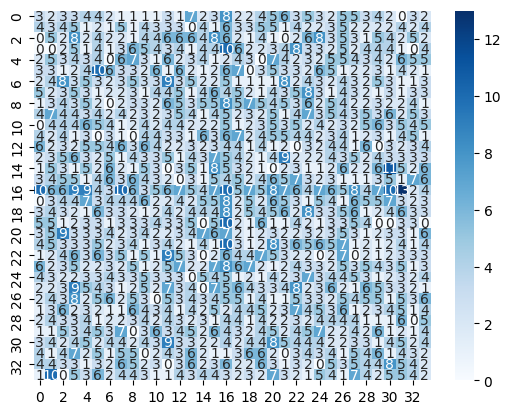

In [ ]:


from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

accuracy0=[]


train0_X, test0_X, train0_Y , test0_Y = train_test_split(X1,y_temp,test_size=0.2)         
prediction0 = MLPClassifier(random_state=45).fit(train0_X,train0_Y)
score_0=prediction0.score(test0_X,test0_Y)
y_pred0 = prediction0.predict(test0_X)
print('Accuracy score calculated on Test Data : ',score_0)
cmatrix=confusion_matrix(test0_Y, y_pred0)
print('Confusion matrix : ',cmatrix)
print()
sns.heatmap(cmatrix, annot=True,fmt="d",cmap='Blues')
matrix_0 = confusion_matrix(test0_Y, y_pred0)
print('Classwise accuracy : ',matrix_0.diagonal()/matrix_0.sum(axis=1) )
print()
print('Classification report : ')
labels = np.unique(dataset['Suggested Job Role'])
print(classification_report(test0_Y, y_pred0))
accuracy0.append(score_0)


# All labels initially **before** reduction of classes

In [ ]:
print('Counting all the labels\n')
Counter(dataset['Suggested Job Role'])

Counting all the labels



Counter({'Database Developer': 581,
         'Portal Administrator': 593,
         'Systems Security Administrator': 562,
         'Business Systems Analyst': 582,
         'Software Systems Engineer': 575,
         'Business Intelligence Analyst': 540,
         'CRM Technical Developer': 567,
         'Mobile Applications Developer': 538,
         'UX Designer': 589,
         'Quality Assurance Associate': 565,
         'Web Developer': 570,
         'Information Security Analyst': 543,
         'CRM Business Analyst': 584,
         'Technical Support': 565,
         'Project Manager': 602,
         'Information Technology Manager': 591,
         'Programmer Analyst': 529,
         'Design & UX': 588,
         'Solutions Architect': 578,
         'Systems Analyst': 550,
         'Network Security Administrator': 1112,
         'Data Architect': 564,
         'Software Developer': 587,
         'E-Commerce Analyst': 546,
         'Technical Services/Help Desk/Tech Support': 558,
      

# **Reducing to 5 classes**

In [ ]:
#Creating the output columns to 5 to 7 classes
new_data = copy.deepcopy(dataset)

#conversion to analyst

new_data['Suggested Job Role'].replace({'Business Systems Analyst':'Analyst','Information Security Analyst':'Analyst', 'Business Intelligence Analyst':'Analyst', 'Systems Analyst':'Analyst',  'E-Commerce Analyst':'Analyst','Programmer Analyst':'Analyst','CRM Business Analyst':'Analyst' }, inplace=True)

#Conversion to developer

new_data['Suggested Job Role'].replace({'CRM Technical Developer':'Dev', 'Applications Developer':'Dev','Software Developer':'Dev','Mobile Applications Developer':'Dev','Database Developer':'Dev','Web Developer':'Dev'}, inplace = True)
#Conversion to quality assurance 

new_data['Suggested Job Role'].replace({'Software Quality Assurance (QA) / Testing':'Quality Assurer','Quality Assurance Associate':'Quality Assurer'}, inplace=True)

#conversion to networking
new_data['Suggested Job Role'].replace({'Network Engineer':'Networking', 'Network Security Administrator':'Networking', 'Network Security Engineer':'Networking','Portal Administrator':'Networking', 'Systems Security Administrator':'Networking'}, inplace=True)

#Converting to UX
new_data['Suggested Job Role'].replace({'UX Designer':'UX','Design & UX':'UX'}, inplace=True)

#conversion to technical support
new_data['Suggested Job Role'].replace({'Technical Engineer':'Technical Support','Technical Services/Help Desk/Tech Support':'Technical Support', 'Technical Support':'Technical Support'}, inplace=True)

#conversion to data scientist
new_data['Suggested Job Role'].replace({'Database Administrator':'Data Scientist','Data Architect':'Data Scientist', 'Database Manager':'Data Scientist'}, inplace=True)

#conversion to SWE
new_data['Suggested Job Role'].replace({ 'Information Technology Manager':'Software Engineer','Solutions Architect':'Software Engineer','Software Engineer':'Software Engineer', 'Information Technology Auditor':'Software Engineer','Software Systems Engineer':'Software Engineer'}, inplace=True)

#further reductions
new_data['Suggested Job Role'].replace({'Dev':'Developer/UX Designer',  'UX':'Developer/UX Designer'}, inplace=True)



new_data['Suggested Job Role'].replace({'Software Engineer':'Software Engineer/Quality Assurance',  'Quality Assurer':'Software Engineer/Quality Assurance'}, inplace=True)


new_data['Suggested Job Role'].replace({'Data Scientist':'Technical Support/Database Engineer','Technical Support':'Technical Support/Database Engineer'}, inplace=True)


new_data['Suggested Job Role'].replace({'Networking':'Network Security/Project Manager','Project Manager':'Network Security/Project Manager'}, inplace=True)
    

# **Counting new labels after reduction of classes**

In [ ]:
print('Counting labels after merging classes')
Counter(new_data['Suggested Job Role'])

Counting labels after merging classes


Counter({'Developer/UX Designer': 4571,
         'Network Security/Project Manager': 4120,
         'Analyst': 3874,
         'Software Engineer/Quality Assurance': 4028,
         'Technical Support/Database Engineer': 3407})

In [ ]:
lbl = LabelEncoder()
new_data['Suggested Job Role'] = lbl.fit_transform(new_data['Suggested Job Role'])
y1 = new_data['Suggested Job Role']
y1 = np.array(y1)
y1

array([1, 2, 2, ..., 0, 3, 1])

# **Training and running model #1 to determine best training split and activator** 

In [ ]:
#training and predicting model once 
# from sklearn.model_selection import GridSearchCV
# train1_X, test1_X, train1_Y , test1_Y = train_test_split(X,y1,test_size=0.2)
# search = GridSearchCV(MLPClassifier(), parameter_grid, scoring='accuracy',n_jobs=-1)
# search.fit(train1_X,train1_Y)
# print(search.best_score_)
# print()
# print(search.best_params_)

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
test_size = [0.1,0.2,0.3,0.4,0.5]
activation= ['identity','logistic', 'tanh', 'relu']
#hidden_layer=[(50),(50,25),(50,50,25),(50,50,25,25)]
for size in test_size:
  print("test_size is",size)
  train1_X, test1_X, train1_Y , test1_Y = train_test_split(X,y1,test_size=size)

  for val in activation:
    print("Activation: ",val)
    prediction = MLPClassifier(random_state=1,max_iter=10000,activation=val).fit(train1_X,train1_Y)
    score_1=prediction.score(test1_X,test1_Y)
  
    #print('Accuracy score calculated on Test Data (before) : ',accuracy_score(y_pred,test1_Y))
    print('Accuracy score calculated on Test Data (initiALLY) : ',score_1)
 

  

test_size is 0.1
Activation:  identity
Accuracy score calculated on Test Data (initiALLY) :  0.214
Activation:  logistic
Accuracy score calculated on Test Data (initiALLY) :  0.2075
Activation:  tanh
Accuracy score calculated on Test Data (initiALLY) :  0.21
Activation:  relu
Accuracy score calculated on Test Data (initiALLY) :  0.221
test_size is 0.2
Activation:  identity
Accuracy score calculated on Test Data (initiALLY) :  0.20325
Activation:  logistic
Accuracy score calculated on Test Data (initiALLY) :  0.21975
Activation:  tanh
Accuracy score calculated on Test Data (initiALLY) :  0.20825
Activation:  relu
Accuracy score calculated on Test Data (initiALLY) :  0.21075
test_size is 0.3
Activation:  identity
Accuracy score calculated on Test Data (initiALLY) :  0.20516666666666666
Activation:  logistic
Accuracy score calculated on Test Data (initiALLY) :  0.1975
Activation:  tanh
Accuracy score calculated on Test Data (initiALLY) :  0.20116666666666666
Activation:  relu
Accuracy sco

Feature selection, identifying 

impactful dict : {'hard/smart worker': 0.008416594427362423, 'memory capability score': 0.00783642991028799, 'Percentage in Mathematics': 0.007742534653285116, 'Hours working per day': 0.007690774287214541, 'Percentage in Computer Architecture': 0.006286825840270627, 'self-learning capability?': 0.006109020722108394, 'Gentle or Tuff behaviour?': 0.0048779315885396635, 'worked in teams ever?': 0.0048034415806901265, 'talenttests taken?': 0.004491035710928237, 'Introvert': 0.004121504752125471, 'interested in games': 0.0038025710957279024, 'Type of company want to settle in?': 0.0036023013057473463, 'Percentage in Software Engineering': 0.003348894900058852, 'certifications': 0.002939396022029417, 'Taken inputs from seniors or elders': 0.002893793952420065, 'Salary Range Expected': 0.0022832254837270582, 'Percentage in Computer Networks': 0.0020723894308654067, 'Salary/work': 0.0017971017243887388, 'Interested Type of Books': 0.0016791574485988114, 'coding skills rating': 0.0009581000990

<AxesSubplot: >

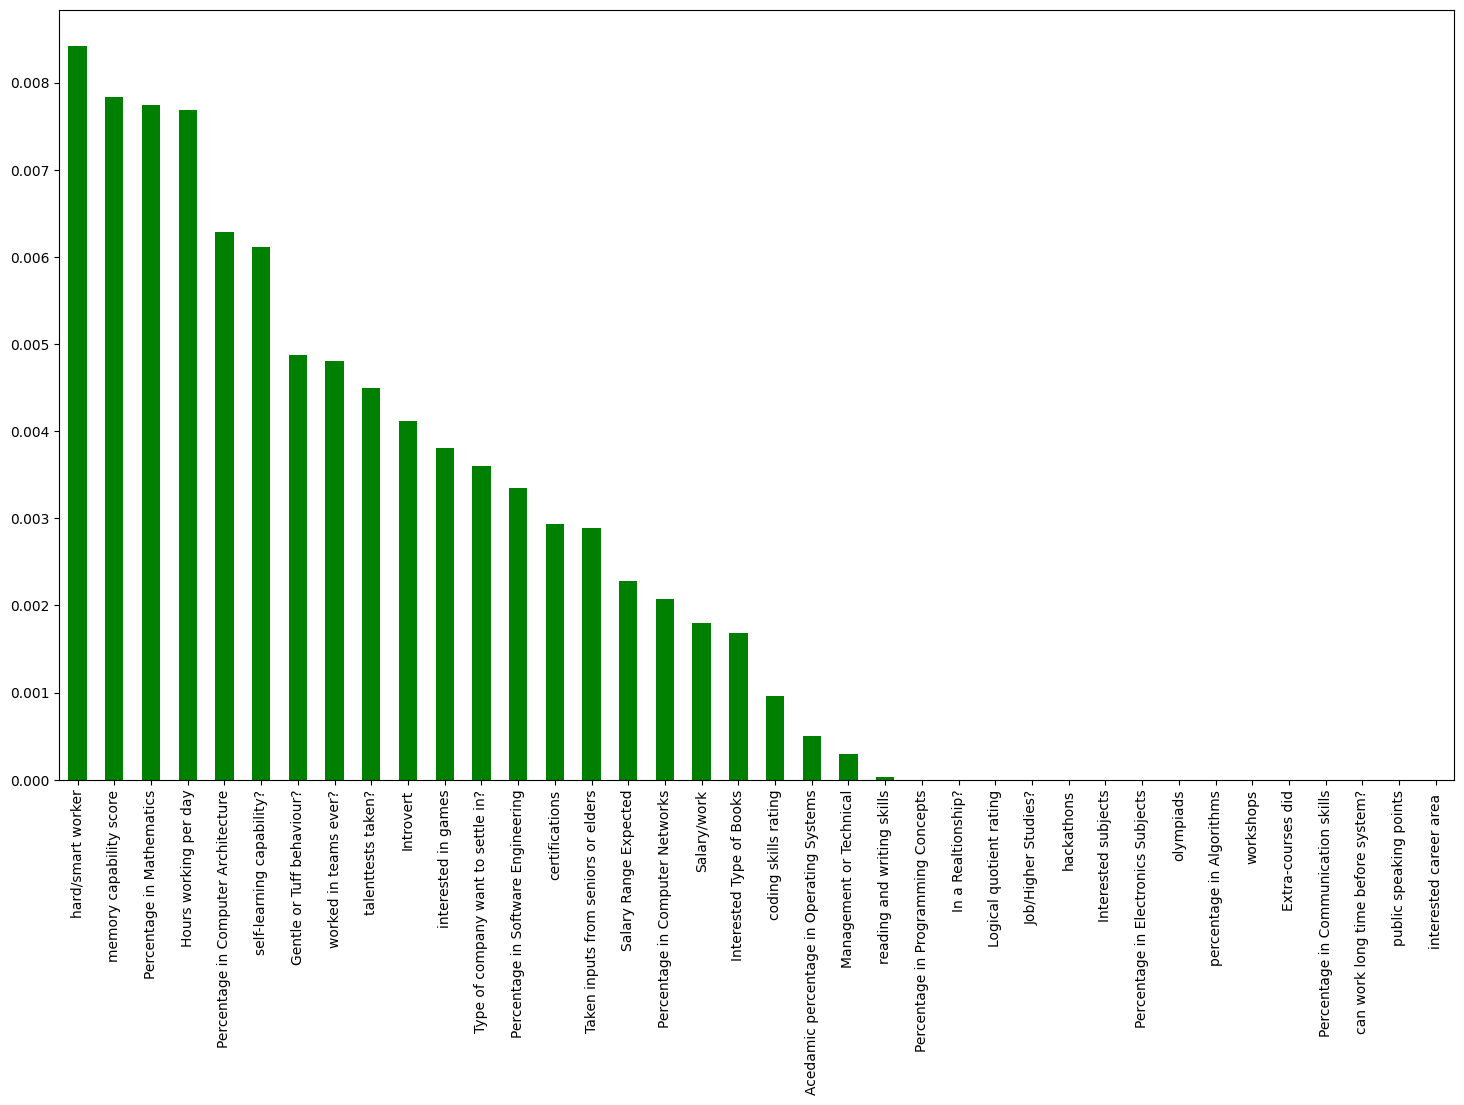

In [ ]:
#to check dependency on columns for the final output, uses the training and testing data
from sklearn.feature_selection import mutual_info_classif

impactful = mutual_info_classif(X,y1)
impactful = pd.Series(impactful, dataset.columns[0:len(dataset.columns)-1])

impactful_dict=impactful.sort_values(ascending=False).to_dict()
print("impactful dict :",impactful_dict)
keys = list(impactful_dict.keys())[0:15]

print("keys",keys)
# print(impactful.sort_values(ascending=False).head(10))

impactful.sort_values(ascending=False).plot(kind = 'bar',color='green',figsize=(18, 10))



In [ ]:
#Taking top features\n

data_impactful = []
for dependency in keys:
  column_index = dataset.columns.get_loc(dependency)
  print(column_index)
  value = X[:,column_index]
  print(value.shape)
  data_impactful.append(value)

data_impactful = np.array(data_impactful)

35
(20000,)
22
(20000,)
7
(20000,)
9
(20000,)
6
(20000,)
15
(20000,)
32
(20000,)
36
(20000,)
19
(20000,)
37
(20000,)
28
(20000,)
26
(20000,)
3
(20000,)
17
(20000,)
27
(20000,)


In [ ]:
data=data_impactful.transpose()
data.shape
#X.shape



(20000, 15)

c:\users\legion\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy score calculated on Test Data :  0.2832195975503062
Confusion matrix :  [[ 75  93  71  99 132]
 [ 68 104  62  88 117]
 [ 69  88  83 124 122]
 [ 69  66  61 132 116]
 [ 56  89  49  91 162]]

Classwise accuracy :  [0.15957447 0.23690205 0.27078189 0.2972973  0.36241611]

Classification report : 
              precision    recall  f1-score   support

           0       0.22      0.16      0.19       470
           1       0.24      0.24      0.24       439
           2       0.27      0.17      0.20       486
           3       0.29      0.30      0.27       444
           4       0.29      0.36      0.30       447

    accuracy                           0.24      2286
   macro avg       0.24      0.25      0.24      2286
weighted avg       0.24      0.24      0.24      2286



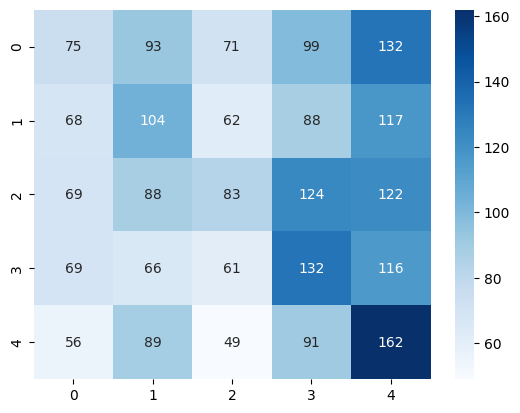

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 
ros = RandomOverSampler()
x_ovs, y_ovs = ros.fit_resample(data, y1)

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

accuracy1=[]


train2_X, test2_X, train2_Y , test2_Y = train_test_split(x_ovs,y_ovs,test_size=0.1)         ##0.2395 at 55
prediction2 = MLPClassifier(random_state=45,max_iter=200,activation='relu',hidden_layer_sizes=(50,55)).fit(train2_X,train2_Y)
score_2=prediction2.score(test2_X,test2_Y)
y_pred2 = prediction2.predict(test2_X)
print('Accuracy score calculated on Test Data : ',score_2)
cmatrix=confusion_matrix(test2_Y, y_pred2)
print('Confusion matrix : ',cmatrix)
print()
sns.heatmap(cmatrix, annot=True,fmt="d",cmap='Blues')
matrix_1 = confusion_matrix(test2_Y, y_pred2)
print('Classwise accuracy : ',matrix_1.diagonal()/matrix_1.sum(axis=1) )
print()
print('Classification report : ')
labels = np.unique(dataset['Suggested Job Role'])
print(classification_report(test2_Y, y_pred2))
accuracy1.append(score_2)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
print(scaled)


[[-1.00471110e+00 -1.22476048e+00  4.17072194e-01 ...  7.07517135e-01
   1.53967740e+00 -1.00360650e+00]
 [-1.00471110e+00 -5.50894312e-04  1.14268910e+00 ... -1.51027815e+00
   3.75195931e-01  9.96406457e-01]
 [-1.00471110e+00 -1.22476048e+00 -7.47844838e-01 ...  7.57476770e-01
  -1.56560652e+00  9.96406457e-01]
 ...
 [-1.00471110e+00 -1.22476048e+00  1.42604910e+00 ...  7.11365140e-01
  -1.29645604e-02  9.96406457e-01]
 [ 9.95310993e-01  1.22365869e+00  1.14899938e+00 ...  1.24902698e+00
  -7.89285542e-01  9.96406457e-01]
 [-1.00471110e+00 -1.22476048e+00 -4.50126396e-01 ...  6.79807102e-01
  -1.56560652e+00  9.96406457e-01]]


solver:  lbfgs
Accuracy score calculated on Test Data :  0.232
Confusion matrix :  [[ 75  93  71  99 132]
 [ 68 104  62  88 117]
 [ 69  88  83 124 122]
 [ 69  66  61 132 116]
 [ 56  89  49  91 162]]

Classwise accuracy :  [0.0025641  0.86157025 0.05966587 0.00777202 0.05607477]

Classification report : 
              precision    recall  f1-score   support

           0       0.50      0.00      0.01       390
           1       0.24      0.86      0.38       484
           2       0.18      0.06      0.09       419
           3       0.25      0.01      0.02       386
           4       0.13      0.06      0.08       321

    accuracy                           0.23      2000
   macro avg       0.26      0.20      0.11      2000
weighted avg       0.26      0.23      0.13      2000

solver:  sgd
Accuracy score calculated on Test Data :  0.3235
Confusion matrix :  [[ 75  93  71  99 132]
 [ 68 104  62  88 117]
 [ 69  88  83 124 122]
 [ 69  66  61 132 116]
 [ 56  89  49  91 162]]

Classwi

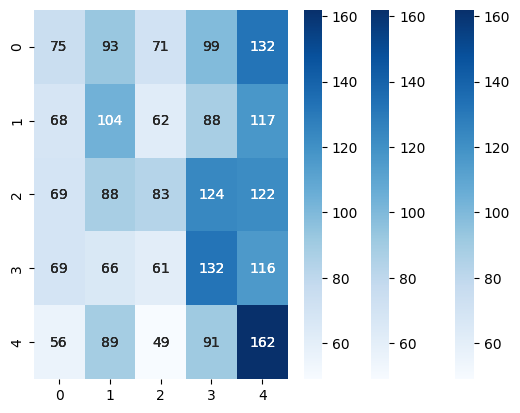

In [ ]:
solver=['lbfgs', 'sgd', 'adam']
accuracy2=[]

# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler 
# ros = RandomOverSampler()
# x_ovs, y_ovs = ros.fit_resample(data, y1)
train3_X, test3_X, train3_Y , test3_Y = train_test_split(scaled,y1,test_size=0.1) 
for solve in solver:
    print('solver: ',solve)
            ##0.2395 at 55
    prediction3 = MLPClassifier(random_state=45,max_iter=500,activation='relu',hidden_layer_sizes=(5),solver=solve).fit(train3_X,train3_Y)
    score_3=prediction3.score(test3_X,test3_Y)
    y_pred3 = prediction3.predict(test3_X)
    print('Accuracy score calculated on Test Data : ',score_3)
    cmatrix=confusion_matrix(test2_Y, y_pred2)
    print('Confusion matrix : ',cmatrix)
    print()
    sns.heatmap(cmatrix, annot=True,fmt="d",cmap='Blues')
    matrix_2 = confusion_matrix(test3_Y, y_pred3)
    print('Classwise accuracy : ',matrix_2.diagonal()/matrix_2.sum(axis=1) )
    print()
    print('Classification report : ')
    labels = np.unique(dataset['Suggested Job Role'])
    print(classification_report(test3_Y, y_pred3))
    accuracy2.append(score_3)

Accuracy score calculated on Test Data :  0.3895
Confusion matrix :  [[ 39 195  95  40   5]
 [ 32 243  93  66   5]
 [ 46 195  90  55   9]
 [ 50 223 113  43   4]
 [ 38 201  72  44   4]]

Classwise accuracy :  [0.20427807 0.75353075 0.5278481  0.09930716 0.01114206]

Classification report : 
              precision    recall  f1-score   support

           0       0.19      0.10      0.13       374
           1       0.23      0.55      0.32       439
           2       0.19      0.23      0.21       395
           3       0.17      0.10      0.13       433
           4       0.15      0.01      0.02       359

    accuracy                           0.21      2000
   macro avg       0.19      0.20      0.16      2000
weighted avg       0.19      0.21      0.17      2000



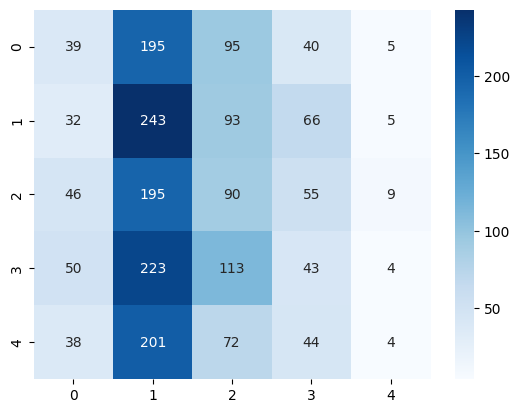

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 
ros = RandomOverSampler()
x_ovs4, y_ovs4 = ros.fit_resample(scaled, y1)

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

accuracy4=[]


train4_X, test4_X, train4_Y , test4_Y = train_test_split(x_ovs4,y_ovs4,test_size=0.1)       
prediction4 = MLPClassifier(random_state=45,max_iter=500,activation='relu',hidden_layer_sizes=(50,55),solver='sgd').fit(train4_X,train4_Y)
score_4=prediction4.score(test4_X,test4_Y)
y_pred4 = prediction4.predict(test4_X)
print('Accuracy score calculated on Test Data : ',score_4)
cmatrix=confusion_matrix(test4_Y, y_pred4)
print('Confusion matrix : ',cmatrix)
print()
sns.heatmap(cmatrix, annot=True,fmt="d",cmap='Blues')
matrix_4 = confusion_matrix(test4_Y, y_pred4)
print('Classwise accuracy : ',matrix_4.diagonal()/matrix_4.sum(axis=1) )
print()
print('Classification report : ')
labels = np.unique(dataset['Suggested Job Role'])
print(classification_report(test4_Y, y_pred4))
accuracy4.append(score_4)
